# Spectrograms of transients

This tutorial shows a few examples of transients that may be found in LIGO data.

Below, for each transient type:

1. Find the data file in the O1 data set that corresponds to the GPS time
 1. Hint: See https://losc.ligo.org/archive/O1/
1. Download the data file
1. Read in the data file, and plot a spectrogram of 200 ms of whitened data around the transient
1. Describe what you see in the spectrogram


Possible ways to make a spectrogram of whitened data include:
* Example with gwpy (Q-scan): https://gwpy.github.io/docs/latest/examples/timeseries/qscan.html
* Example using matplotlib (Quickview): http://beta.mybinder.org/repo/losc-tutorial/quickview 
 * Quickview code at https://github.com/losc-tutorial/quickview
* Use https://qscan.ligo.org (no code required)

### Imports and set-up

In [1]:
# Standard python numerical analysis imports:
!pip install gwpy
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import h5py
import json
import sys

pyversion = sys.version_info.major
if pyversion == 2: 
    import urllib2
else:
    import urllib.request
    
import os
from gwpy.timeseries import TimeSeries

# the IPython magic below must be commented out in the .py file, since it doesn't work there.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

### Define a handy function for data downloads

In [0]:
try: os.mkdir('./data')
except: pass

# -- Handy function to download data file, and return the filename
def download(url):
    filename = os.path.join('data', url.split('/')[-1])
    print('Downloading ' + url )
    if pyversion == 2: 
        r = urllib2.urlopen(url).read()
        f = open(filename, 'w')   # write it to the right filename
        f.write(r)
        f.close()
    else:
        urllib.request.urlretrieve(url, filename)  
    print("File download complete")
    return filename

## Hardware Injections

LIGO data includes simulated signals known as hardware injections.

1. See the O1 hardware injection page: https://losc.ligo.org/o1_inj/
1. Find a CBC injection with SNR > 30
1. Download the data file, and make a spectrogram of the whitened data

#### Question:
* Describe what you seen in the spectrogram:

#### To help get started, we'll show you this one using gwpy

In [3]:
## Make a spectrogram of a hardware injection
gps_inj = 1128668183
url_inj = 'https://losc.ligo.org/archive/data/O1/1128267776/H-H1_LOSC_4_V1-1128665088-4096.hdf5'
fn_inj = download(url_inj)

File download complete


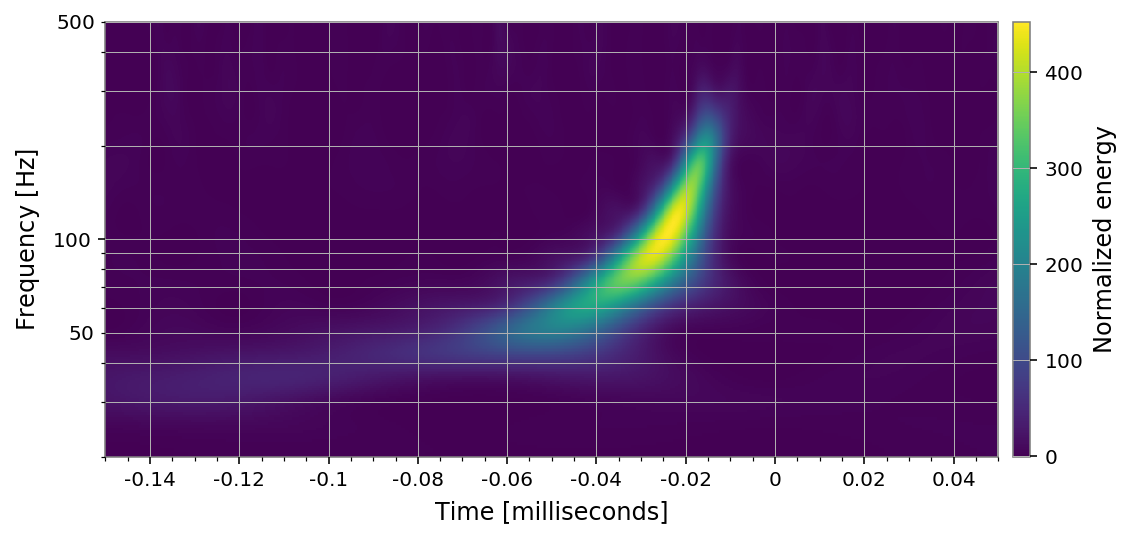

In [4]:
gps = gps_inj
fn = fn_inj
inj_data = TimeSeries.read(fn, format='hdf5.losc', start=gps-16, end=gps+16)
# -- Follow example at https://gwpy.github.io/docs/stable/examples/timeseries/qscan.html
plot = inj_data.q_transform(outseg=(gps-.15, gps+.05)).plot(figsize=[8, 4])
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.set_xlabel('Time [milliseconds]')
ax.set_ylim(20, 500)
ax.grid(True, axis='y', which='both')
plot.add_colorbar(cmap='viridis', label='Normalized energy')

## Koi Fish Glitch

"Glitches" are transient instrumental artifacts in the data.  Glitches may be classified by their time-frequency properties and/or cause.  One class of glitches is known as "Koi Fish"

1. A Koi Fish glitch occurs in Hanford data at GPS 1132401286.330
1. Find and download the corresponding data file from O1
1. Make a spectrogram of the whitened data around this event

#### Question:
* Describe what you seen in the spectrogram:


File download complete


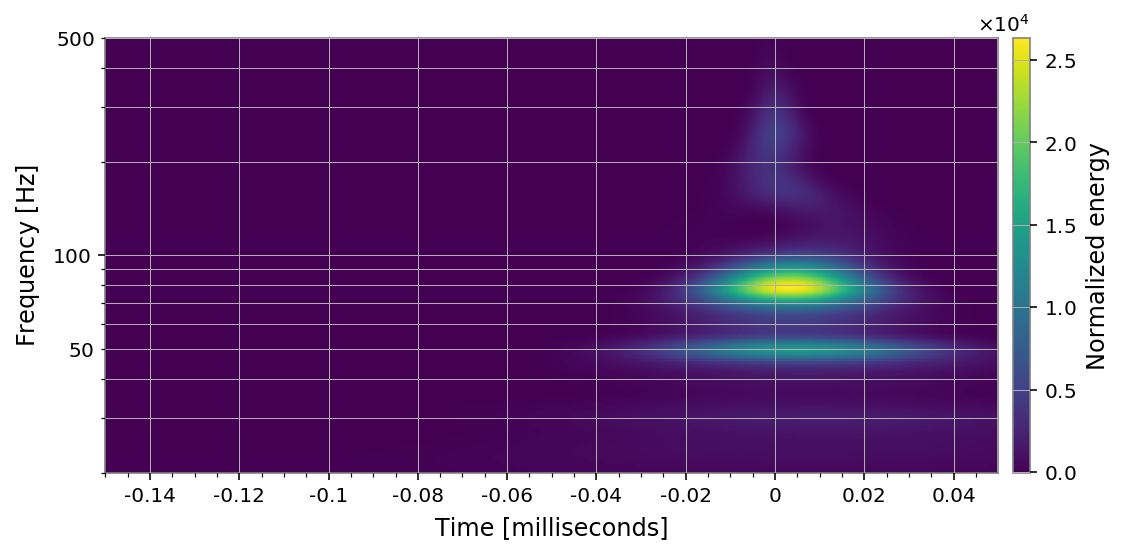

In [5]:
# -- Koi fish glitch
gps = 1132401286.330
url = 'https://losc.ligo.org/archive/data/O1/1131413504/H-H1_LOSC_4_V1-1132400640-4096.hdf5'
fn = download(url)

data = TimeSeries.read(fn, format='hdf5.losc', start=gps-16, end=gps+16)

# -- Follow example at https://gwpy.github.io/docs/stable/examples/timeseries/qscan.html
plot = data.q_transform(outseg=(gps-.15, gps+.05)).plot(figsize=[8, 4])
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.set_xlabel('Time [milliseconds]')
ax.set_ylim(20, 500)
ax.grid(True, axis='y', which='both')
plot.add_colorbar(cmap='viridis', label='Normalized energy')

## Scratchy glitch

Another category of glitches are known as "Scratchy Glitches".

1. A Scratchy glitch occurs in Hanford data at GPS 1128779800.440
2. Find the corresponding data file and download it
3. Plot a spectrogram of the whitened data around this time

#### Question:
* Describe what you seen in the spectrogram:

File download complete


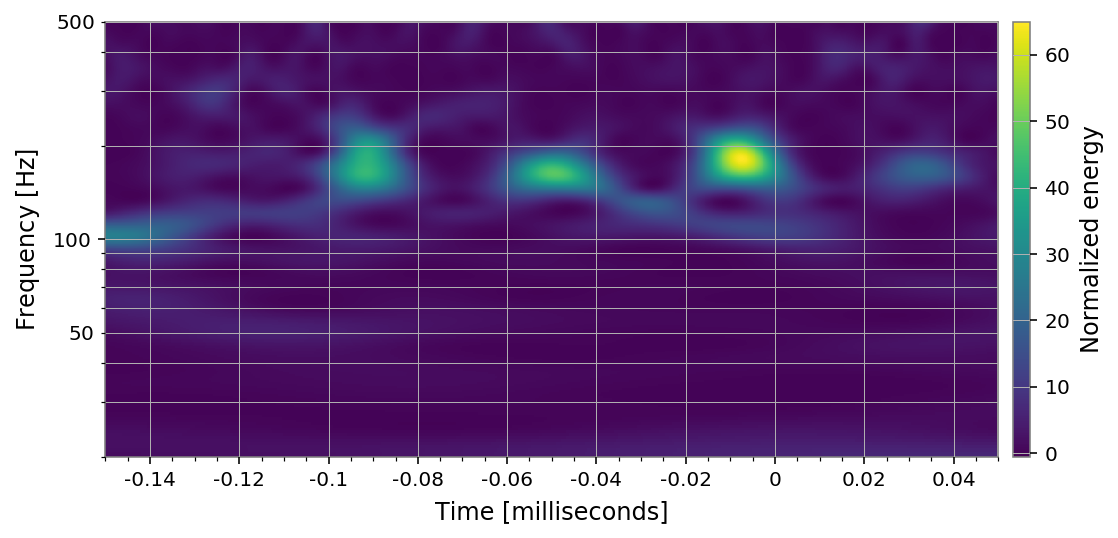

In [6]:
# -- Scratchy glitch
gps = 1128779800.440
url = 'https://losc.ligo.org/archive/data/O1/1128267776/H-H1_LOSC_4_V1-1128779776-4096.hdf5'
fn = download(url)

data = TimeSeries.read(fn, format='hdf5.losc', start=gps-16, end=gps+16)

# -- Follow example at https://gwpy.github.io/docs/stable/examples/timeseries/qscan.html
plot = data.q_transform(outseg=(gps-.15, gps+.05)).plot(figsize=[8, 4])
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.set_xlabel('Time [milliseconds]')
ax.set_ylim(20, 500)
ax.grid(True, axis='y', which='both')
plot.add_colorbar(cmap='viridis', label='Normalized energy')

### More to Explore

The S6 data set contains hardware injections with a variety of morphologies, including supernovae waveforms, cosmic strings, white noise bursts, black hole ringdowns, and sine-Gaussians.

For documentation, see:
https://losc.ligo.org/s6hwburst/

1. Use the documentation at https://losc.ligo.org/s6hwburst/ to find times of each of these morphologies.

2. Make a spectrogram for 1 loud example of each morphology type

3. See if you can write an algorithm that looks for burst signals by thresholding on loud pixels in the spectrogram, and then looks for times of coincident "triggers" between detectors

4. You can test your algorithm on some burst hardware injections.  For comparison, try some times without hardware injections.